## UBER NEW YORK DATA ANALYSIS

  
1. ### How to read data for Analysis
2. ### Performing Data pre-processing / Data cleaning
3. ### Analyzing which month have max Uber Pickups
4. ### Analyzing hourly rush in New York
5. ### Analyzing most active Uber-base-number
6. ### Perform patial analysis to find rush of Uber Pickups
7. ### Perfom pair wise analysis to figure out rush

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os 
os.listdir(r"/Users/ikawahyuni/Downloads/Project Portofolio/projct 5-uber/Datasets")

['other-Lyft_B02510.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-janjune-15.csv',
 'other-American_B01362.csv',
 'uber-raw-data-apr14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-Highclass_B01717.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv',
 'other-Diplo_B01196.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-may14.csv',
 'other-Prestige_B01338.csv']

In [93]:
uber_1 = pd.read_csv(r"/Users/ikawahyuni/Downloads/Project Portofolio/projct 5-uber/Datasets/other-Lyft_B02510.csv")

In [94]:
uber_1.head()

time_of_trip  start_lat  start_lng Unnamed: 3
0    9/4/2014 9:51   40.64705  -73.77988        NaN
1  8/27/2014 21:13   40.74916  -73.98373        NaN
2   9/4/2014 14:16   40.64065  -73.97594        NaN
3   9/4/2014 16:08   40.75002  -73.99514        NaN
4   8/28/2014 2:41   40.76715  -73.98636        NaN

In [95]:
uber_1.duplicated().sum()

np.int64(1)

In [96]:
uber_1.drop_duplicates(inplace=True)

In [97]:
uber_1.duplicated().sum()

np.int64(0)

In [98]:
uber_1.isnull()

time_of_trip  start_lat  start_lng  Unnamed: 3
0              False      False      False        True
1              False      False      False        True
2              False      False      False        True
3              False      False      False        True
4              False      False      False        True
...              ...        ...        ...         ...
267696         False      False      False        True
267697         False      False      False        True
267698         False      False      False        True
267699         False      False      False        True
267700         False      False      False        True

[267700 rows x 4 columns]

In [99]:
uber_1.isnull().sum()

time_of_trip         0
start_lat            1
start_lng            1
Unnamed: 3      266502
dtype: int64

In [100]:
uber_1.dtypes

time_of_trip     object
start_lat       float64
start_lng       float64
Unnamed: 3       object
dtype: object

In [101]:
uber_2 = pd.read_csv(r"/Users/ikawahyuni/Downloads/Project Portofolio/projct 5-uber/Datasets/uber-raw-data-janjune-15_sample.csv")
uber_2.head()

Dispatching_base_num          Pickup_date Affiliated_base_num  locationID
0               B02617  2015-05-02 21:43:00              B02764         237
1               B02682  2015-01-20 19:52:59              B02682         231
2               B02617  2015-03-19 20:26:00              B02617         161
3               B02764  2015-04-10 17:38:00              B02764         107
4               B02764  2015-03-23 07:03:00              B00111         140

In [102]:
uber_2.dtypes
#pickup date type is object not datetime so if you run code
#uber_2['Pickup_date'].dt.month there will be an error occur, therefore you need to change the type format 

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [103]:
#lets make another df ['month']
uber_2['Pickup_date'] = pd.to_datetime(uber_2['Pickup_date'])

In [104]:
uber_2.dtypes
#we can see new df 'month'

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [105]:
uber_2['month']=uber_2['Pickup_date'].dt.month_name()
uber_2['month']

0            May
1        January
2          March
3          April
4          March
          ...   
99995      April
99996      March
99997      March
99998        May
99999       June
Name: month, Length: 100000, dtype: object

<Axes: xlabel='month'>

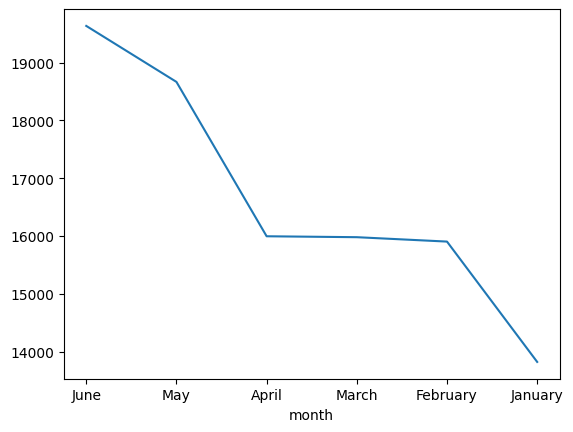

In [106]:
#simple plot uber pickup base on month 
uber_2['month'].value_counts().plot()


<Axes: xlabel='month'>

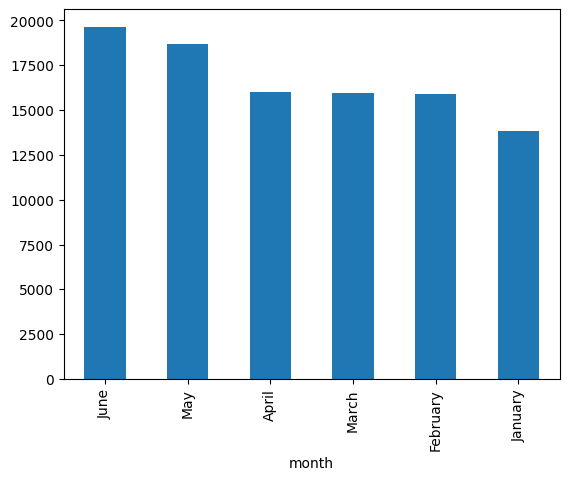

In [107]:
#simple plot uber pickup base on month 
uber_2['month'].value_counts().plot(kind='bar')
#value_counts() berfungsi untuk menghitung jumlah kemunculan setiap nilai unik dalam sebuah kolom


In [108]:
uber_2['day']=uber_2['Pickup_date'].dt.day_name()
uber_2['day']




0         Saturday
1          Tuesday
2         Thursday
3           Friday
4           Monday
           ...    
99995       Monday
99996       Friday
99997     Thursday
99998     Saturday
99999    Wednesday
Name: day, Length: 100000, dtype: object

<Axes: xlabel='day'>

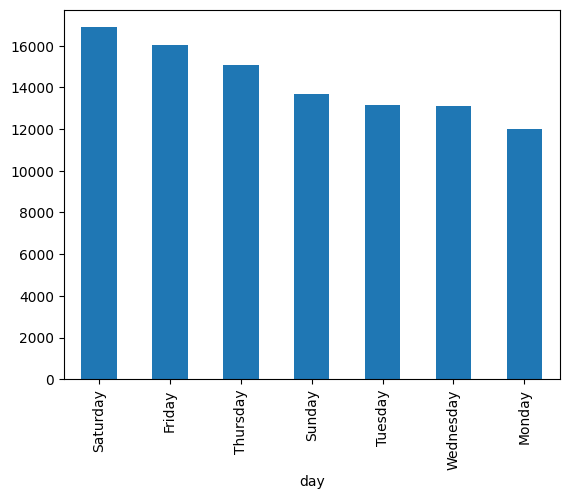

In [109]:
uber_2['day'].value_counts().plot(kind='bar')

### Result Problem 1: Based on the plot above we know that the highest Uber Pickup based on month is in JUNE**

In [110]:
uber_2['month'] = uber_2['Pickup_date'].dt.month_name()
uber_2['day'] = uber_2['Pickup_date'].dt.day_name()
uber_2['hour'] = uber_2['Pickup_date'].dt.hour
uber_2['minute'] = uber_2['Pickup_date'].dt.minute

In [111]:
uber_2.head()

Dispatching_base_num         Pickup_date Affiliated_base_num  locationID  \
0               B02617 2015-05-02 21:43:00              B02764         237   
1               B02682 2015-01-20 19:52:59              B02682         231   
2               B02617 2015-03-19 20:26:00              B02617         161   
3               B02764 2015-04-10 17:38:00              B02764         107   
4               B02764 2015-03-23 07:03:00              B00111         140   

     month       day  hour  minute  
0      May  Saturday    21      43  
1  January   Tuesday    19      52  
2    March  Thursday    20      26  
3    April    Friday    17      38  
4    March    Monday     7       3

In [112]:
pivot = pd.crosstab(index=uber_2['month'], columns=uber_2['day'])
pivot
#dont forget uber_2 or the name of df must be always writen

day       Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
month                                                                   
April       2366    1834      2512    2056      2826     1880       2521
February    2656    1970      2551    2187      2397     2129       2013
January     2508    1353      2745    1651      2378     1444       1741
June        2794    2852      3037    2488      2770     3191       2504
March       2467    2117      2524    2380      2093     2390       2008
May         3263    1865      3521    2946      2628     2115       2329

In [113]:
#to make an index and columns we can use pd.crosstab
pivot_1 = pd.crosstab(index=uber_2['hour'], columns=uber_2['day'])
pivot_1

day   Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
hour                                                                
0        581     339      1035    1117       484      342        343
1        333     178       679     889       248      178        232
2        197     109       509     621       181       94        103
3        138     100       356     436       112       62         64
4        161     139       247     290       142      102         97
5        221     238       170     190       183      179        173
6        354     349       191     172       354      328        320
7        547     512       231     193       542      549        543
8        721     684       329     253       695      689        684
9        735     659       419     338       700      702        673
10       548     545       501     444       560      505        495
11       564     493       595     535       467      482        436
12       523     507       708     607       527      443        476
13       551     444       676     662       502      487        415
14       629     515       671     717       555      514        541
15       689     566       665     701       689      599        589
16       760     620       880     734       777      696        658
17       973     748      1005     812       972      849        818
18      1109     822      1082     743      1166     1032        994
19      1205     836      1191     712      1095     1039       1044
20      1183     725      1129     698      1092      897        898
21      1013     746      1130     616      1060      921        949
22      1108     639      1199     658      1045      803        900
23      1211     478      1292     570       944      657        671

Text(0, 0.5, 'Number of Pickups')

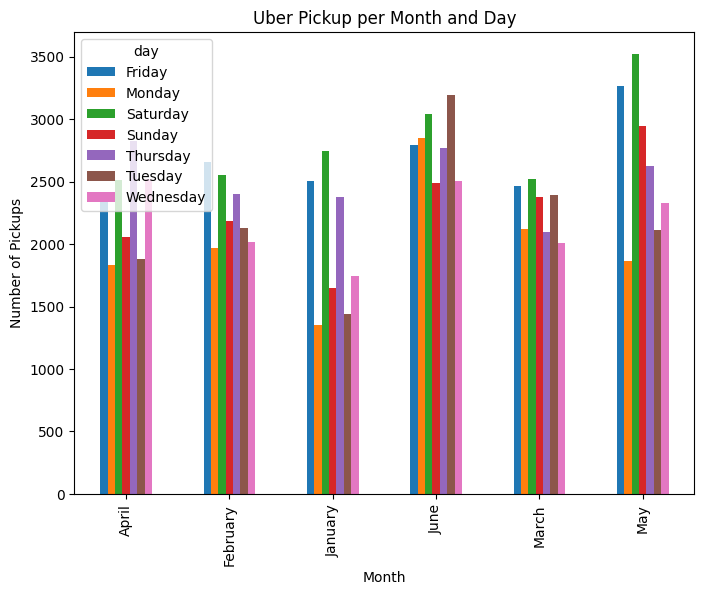

In [114]:
pivot.plot(kind='bar', figsize=(8,6))
plt.title("Uber Pickup per Month and Day")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")

In [115]:
#from the picture above we can see that May and June become month with highest pick up, but we can count it to see the detail 
total_per_month = pivot.sum(axis=1)
print(total_per_month)
best_month = total_per_month.idxmax()
#idxmax() berfungsi untuk mendapatkan label indeks dari nilai maksimum dalam sebuah Series atau DataFrame
print(f"\nHighest pickups: {best_month} with {int(total_per_month[best_month])} pickups")
print(f"Comparison — June: {int(total_per_month['June'])}, May: {int(total_per_month['May'])}")

month
April       15995
February    15903
January     13820
June        19636
March       15979
May         18667
dtype: int64

Highest pickups: June with 19636 pickups
Comparison — June: 19636, May: 18667


In [116]:
summary_day_hour = uber_2.groupby(['day', 'hour']).count()
summary_day_hour

Dispatching_base_num  Pickup_date  Affiliated_base_num  \
day       hour                                                           
Friday    0                      581          581                  576   
          1                      333          333                  332   
          2                      197          197                  194   
          3                      138          138                  137   
          4                      161          161                  158   
...                              ...          ...                  ...   
Wednesday 19                    1044         1044                 1026   
          20                     898          898                  894   
          21                     949          949                  937   
          22                     900          900                  890   
          23                     671          671                  667   

                locationID  month  minute  
day       hour                             
Friday    0            581    581     581  
          1            333    333     333  
          2            197    197     197  
          3            138    138     138  
          4            161    161     161  
...                    ...    ...     ...  
Wednesday 19          1044   1044    1044  
          20           898    898     898  
          21           949    949     949  
          22           900    900     900  
          23           671    671     671  

[168 rows x 6 columns]

In [117]:
summary_day_hour = uber_2.groupby(['day', 'hour'], as_index=False).size()
summary_day_hour
#as_index=False berfungsi untuk mengubah index menjadi kolom biasa agar size bisa muncul
#size() berfungsi untuk menghitung jumlah data pada setiap kelompok
#size jika digabungkan dengan groupby akan memberikan jumlah baris untuk setiap kombinasi unik dari kolom yang dikelompokkan
#size nanti digunakan untuk pointplot

day  hour  size
0       Friday     0   581
1       Friday     1   333
2       Friday     2   197
3       Friday     3   138
4       Friday     4   161
..         ...   ...   ...
163  Wednesday    19  1044
164  Wednesday    20   898
165  Wednesday    21   949
166  Wednesday    22   900
167  Wednesday    23   671

[168 rows x 3 columns]

In [118]:
summary_month_day = uber_2.groupby(['month', 'day']).count()
summary_month_day

Dispatching_base_num  Pickup_date  Affiliated_base_num  \
month    day                                                                 
April    Friday                     2366         2366                 2366   
         Monday                     1834         1834                 1834   
         Saturday                   2512         2512                 2512   
         Sunday                     2056         2056                 2056   
         Thursday                   2826         2826                 2826   
         Tuesday                    1880         1880                 1880   
         Wednesday                  2521         2521                 2521   
February Friday                     2656         2656                 2580   
         Monday                     1970         1970                 1907   
         Saturday                   2551         2551                 2456   
         Sunday                     2187         2187                 2098   
         Thursday                   2397         2397                 2334   
         Tuesday                    2129         2129                 2043   
         Wednesday                  2013         2013                 1936   
January  Friday                     2508         2508                 2414   
         Monday                     1353         1353                 1300   
         Saturday                   2745         2745                 2614   
         Sunday                     1651         1651                 1573   
         Thursday                   2378         2378                 2287   
         Tuesday                    1444         1444                 1389   
         Wednesday                  1741         1741                 1674   
June     Friday                     2794         2794                 2794   
         Monday                     2852         2852                 2852   
         Saturday                   3037         3037                 3037   
         Sunday                     2488         2488                 2488   
         Thursday                   2770         2770                 2770   
         Tuesday                    3191         3191                 3191   
         Wednesday                  2504         2504                 2504   
March    Friday                     2467         2467                 2467   
         Monday                     2117         2117                 2117   
         Saturday                   2524         2524                 2524   
         Sunday                     2380         2380                 2380   
         Thursday                   2093         2093                 2093   
         Tuesday                    2390         2390                 2390   
         Wednesday                  2008         2008                 2008   
May      Friday                     3263         3263                 3263   
         Monday                     1865         1865                 1865   
         Saturday                   3521         3521                 3521   
         Sunday                     2946         2946                 2946   
         Thursday                   2628         2628                 2628   
         Tuesday                    2115         2115                 2115   
         Wednesday                  2329         2329                 2329   

                    locationID  hour  minute  
month    day                                  
April    Friday           2366  2366    2366  
         Monday           1834  1834    1834  
         Saturday         2512  2512    2512  
         Sunday           2056  2056    2056  
         Thursday         2826  2826    2826  
         Tuesday          1880  1880    1880  
         Wednesday        2521  2521    2521  
February Friday           2656  2656    2656  
         Monday           1970  1970    1970  
         Saturday         2551  2551    2551  
         Sunday        

<Axes: >

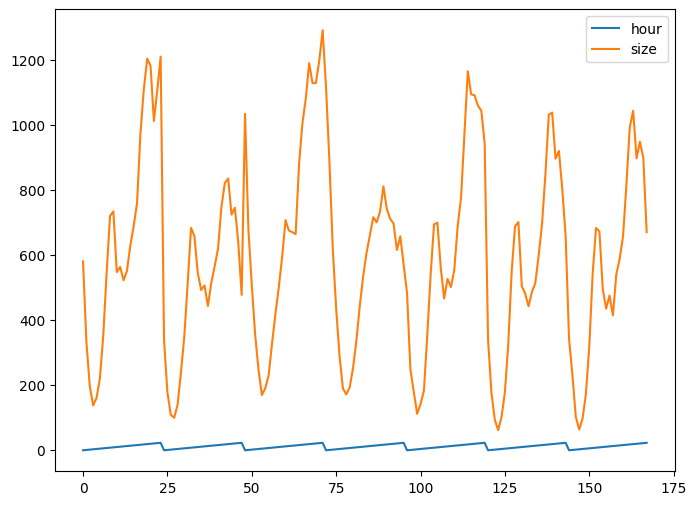

In [119]:
summary_day_hour = uber_2.groupby(['day', 'hour'], as_index=False).size()
summary_day_hour.plot(kind='line', figsize=(8,6))
#plot ini masih kurang tepat karena garisnya saling tumpang tindih
#jadi kita buat pointplot agar lebih jelas

<Figure size 800x600 with 0 Axes>

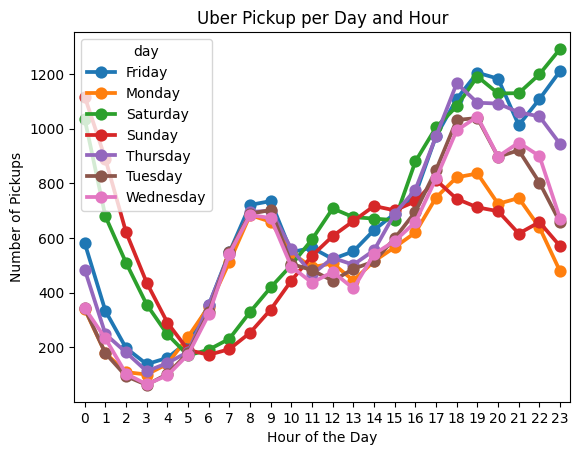

<Figure size 800x600 with 0 Axes>

In [120]:
sns.pointplot(data=summary_day_hour, x="hour", y="size", hue="day")
plt.title("Uber Pickup per Day and Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.figure(figsize=(8,6))

#sns.pointplot adalah matplotlib untuk membuat pointplot

### Result Problem 2
### Based on the result above we can see that in wekeend (Saturday and Sunday) in new york uber pickup is high but in the evening 
### starting from 18.00 on Sunday, it seems down compare to saturday (green)
### Also similar trend in the highest peak (3 line above) which means that new york people mostly start their weekends from 
## Thursday, Friday, Saturday in the evening 

In [121]:
uber_2.head()

Dispatching_base_num         Pickup_date Affiliated_base_num  locationID  \
0               B02617 2015-05-02 21:43:00              B02764         237   
1               B02682 2015-01-20 19:52:59              B02682         231   
2               B02617 2015-03-19 20:26:00              B02617         161   
3               B02764 2015-04-10 17:38:00              B02764         107   
4               B02764 2015-03-23 07:03:00              B00111         140   

     month       day  hour  minute  
0      May  Saturday    21      43  
1  January   Tuesday    19      52  
2    March  Thursday    20      26  
3    April    Friday    17      38  
4    March    Monday     7       3

In [122]:
#Which Base Number has most number of Active Vehicles
uber_2.columns
#dispatching base number dosent mean the number of active vehicles
#so we read another dataset that contain active vehicles

Index(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [123]:
import os 
os.listdir(r"/Users/ikawahyuni/Downloads/Project Portofolio/projct 5-uber/Datasets")

['other-Lyft_B02510.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-janjune-15.csv',
 'other-American_B01362.csv',
 'uber-raw-data-apr14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-Highclass_B01717.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv',
 'other-Diplo_B01196.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-may14.csv',
 'other-Prestige_B01338.csv']

In [124]:
uber_3 = pd.read_csv(r"/Users/ikawahyuni/Downloads/Project Portofolio/projct 5-uber/Datasets/Uber-Jan-Feb-FOIL.csv")
uber_3.head()

dispatching_base_number      date  active_vehicles  trips
0                  B02512  1/1/2015              190   1132
1                  B02765  1/1/2015              225   1765
2                  B02764  1/1/2015             3427  29421
3                  B02682  1/1/2015              945   7679
4                  B02617  1/1/2015             1228   9537

In [125]:
uber_3.shape
#354 rows and 4 columns

(354, 4)

In [126]:
%pip install chart_studio
%pip install plotly

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [127]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [128]:
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#library interaktif adalah menggunakan plotly
#chart studio digunakan hanya sebagai platform untuk menyimpan dan berbagi visualisasi plotly secara online

In [129]:
uber_3.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

In [130]:
px.box(data_frame=uber_3, x='dispatching_base_number', y='active_vehicles')

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt # Diperlukan untuk menampilkan plot
import pandas as pd

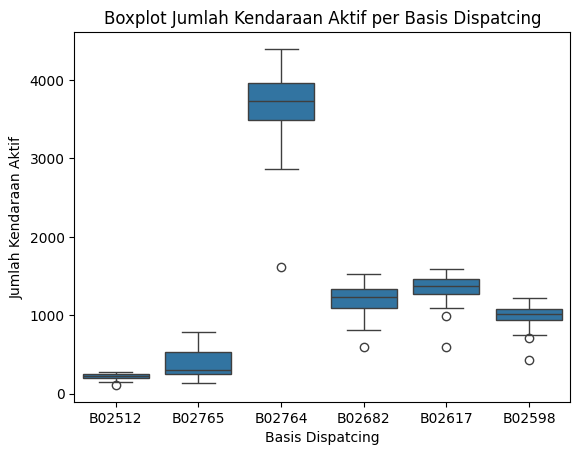

In [132]:
# Ganti nama_dataframe, nama_kolom_X, dan nama_kolom_Y dengan data Anda
sns.boxplot(x='dispatching_base_number', y='active_vehicles', data=uber_3)

# Tambahkan judul dan label jika perlu
plt.title('Boxplot Jumlah Kendaraan Aktif per Basis Dispatcing')
plt.xlabel('Basis Dispatcing')
plt.ylabel('Jumlah Kendaraan Aktif')

# Tampilkan plot
plt.show()

### From the boxplot above we can see that B02764 has the highest number of active vehicles
### B02764 is the base with the most number of active vehicles


## Collect Entire Data 

In [150]:
files=os.listdir(r"/Users/ikawahyuni/Downloads/Project Portofolio/projct 5-uber/Datasets")
files

['other-Lyft_B02510.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-janjune-15.csv',
 'other-American_B01362.csv',
 'uber-raw-data-apr14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-Highclass_B01717.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv',
 'other-Diplo_B01196.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-may14.csv',
 'other-Prestige_B01338.csv']

In [151]:
files.remove('uber-raw-data-janjune-15.csv')



In [152]:
files

['other-Lyft_B02510.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'other-American_B01362.csv',
 'uber-raw-data-apr14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-Highclass_B01717.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv',
 'other-Diplo_B01196.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-may14.csv',
 'other-Prestige_B01338.csv']

In [ ]:
final = pd.DataFrame()

path = r"/Users/ikawahyuni/Downloads/Project Portofolio/projct 5-uber/Datasets"
for file in files:
    file_path = os.path.join(path, file)
    try:
        # try the default utf-8 first
        current_df = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')
    except UnicodeDecodeError:
        # if utf-8 fails, use latin-1
        current_df = pd.read_csv(file_path, encoding='latin-1', on_bad_lines='skip')
    # concatenate and avoid index duplication; allow different columns across files
    final = pd.concat([final, current_df], ignore_index=True, sort=False)


In [160]:
final.shape

(6337643, 41)

In [161]:
final.duplicated().sum()

np.int64(104424)

In [162]:
final.drop_duplicates(inplace=True)

In [163]:
final.duplicated().sum()

np.int64(0)

In [164]:
final.head()

time_of_trip  start_lat  start_lng Unnamed: 3 Base Number Base Name  \
0    9/4/2014 9:51   40.64705  -73.77988        NaN         NaN       NaN   
1  8/27/2014 21:13   40.74916  -73.98373        NaN         NaN       NaN   
2   9/4/2014 14:16   40.64065  -73.97594        NaN         NaN       NaN   
3   9/4/2014 16:08   40.75002  -73.99514        NaN         NaN       NaN   
4   8/28/2014 2:41   40.76715  -73.98636        NaN         NaN       NaN   

  Pick Up Date Number of Trips Number of Vehicles DATE  ... DO_Address  \
0          NaN             NaN                NaN  NaN  ...        NaN   
1          NaN             NaN                NaN  NaN  ...        NaN   
2          NaN             NaN                NaN  NaN  ...        NaN   
3          NaN             NaN                NaN  NaN  ...        NaN   
4          NaN             NaN                NaN  NaN  ...        NaN   

  Routing Details PU_Address.1 Status PU_Adress Base_No  State  PuFrom  \
0             NaN          NaN    NaN       NaN     NaN    NaN     NaN   
1             NaN          NaN    NaN       NaN     NaN    NaN     NaN   
2             NaN          NaN    NaN       NaN     NaN    NaN     NaN   
3             NaN          NaN    NaN       NaN     NaN    NaN     NaN   
4             NaN          NaN    NaN       NaN     NaN    NaN     NaN   

  Address Street  
0     NaN    NaN  
1     NaN    NaN  
2     NaN    NaN  
3     NaN    NaN  
4     NaN    NaN  

[5 rows x 41 columns]

In [165]:
final.isnull().sum()

time_of_trip               5965519
start_lat                  5965520
start_lng                  5965520
Unnamed: 3                 6232021
Base Number                6207038
Base Name                  6207038
Pick Up Date               6207038
Number of Trips            6207038
Number of Vehicles         6207038
DATE                       5506815
TIME                       5506815
PICK UP ADDRESS            5658050
Date                       5572331
Time                       5572331
    Street_Address         6110376
    City_State             6110376
Unnamed: 4                 6233219
Unnamed: 5                 6233219
Dispatching_base_num       6133273
Pickup_date                6133273
Affiliated_base_num        6134389
locationID                 6133273
Date/Time                  1781473
Lat                        1781473
Lon                        1781473
Base                       1781473
dispatching_base_number    6232865
date                       6232865
active_vehicles     

## Geospasial Analysis to Find Uber Hotspot Location

In [181]:
rush_map = final.groupby(['start_lat', 'start_lng'],as_index=False).size()
rush_map.head()

start_lat  start_lng  size
0   40.52785  -74.22689     1
1   40.53042  -74.20857     1
2   40.54168  -74.14667     1
3   40.54979  -74.19208     1
4   40.55951  -74.11307     1

In [182]:
pip install folium 

Note: you may need to restart the kernel to use updated packages.


In [183]:
import folium 

In [184]:
basemap = folium.Map()
basemap

In [185]:
from folium.plugins import HeatMap



In [186]:
HeatMap(rush_map).add_to(basemap)

In [187]:
basemap

## Examine rush on hour and weekday (Perform Pair Wise Analysis)

In [219]:
final_2=os.listdir(r"/Users/ikawahyuni/Downloads/Project Portofolio/projct 5-uber/Datasets")
final_2

['other-Lyft_B02510.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Skyline_B00111.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-janjune-15.csv',
 'other-American_B01362.csv',
 'uber-raw-data-apr14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-Highclass_B01717.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv',
 'other-Diplo_B01196.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-may14.csv',
 'other-Prestige_B01338.csv']

In [229]:
final_2=os.listdir(r"/Users/ikawahyuni/Downloads/Project Portofolio/projct 5-uber/Datasets")[7:]
final_2

['uber-raw-data-apr14.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'other-Highclass_B01717.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'other-Federal_02216.csv',
 'uber-raw-data-jun14.csv',
 'other-Carmel_B00256.csv',
 'other-Diplo_B01196.csv',
 'other-Dial7_B00887.csv',
 'uber-raw-data-may14.csv',
 'other-Prestige_B01338.csv']

In [230]:
# Remove multiple files safely from the list final_2
to_remove = [
    'Uber-Jan-Feb-FOIL.csv',
    'other-Highclass_B01717.csv',
    'other-Federal_02216.csv',
    'other-Carmel_B00256.csv',
    'other-Diplo_B01196.csv',
    'other-Dial7_B00887.csv',
    'other-Prestige_B01338.csv'
]

for item in to_remove:
    try:
        final_2.remove(item)
    except ValueError:
        # item not in list, ignore
        pass

In [231]:
final_2

['uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-sep14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv']

In [236]:
final_2_ = pd.DataFrame()

path = r"/Users/ikawahyuni/Downloads/Project Portofolio/projct 5-uber/Datasets"
for file in files:
    file_path = os.path.join(path, file)
    try:
        # try the default utf-8 first
        df = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip')
    except UnicodeDecodeError:
        # if utf-8 fails, use latin-1
        df = pd.read_csv(file_path, encoding='latin-1', on_bad_lines='skip')
    # concatenate and avoid index duplication; allow different columns across files
    final_2 = pd.concat([final_2, df], ignore_index=True, sort=False)


In [238]:
final_2.head()

Date/Time      Lat      Lon    Base Date Time PU_Address DO_Address  \
0  6/1/2014 0:00:00  40.7293 -73.9920  B02512  NaN  NaN        NaN        NaN   
1  6/1/2014 0:01:00  40.7131 -74.0097  B02512  NaN  NaN        NaN        NaN   
2  6/1/2014 0:04:00  40.3461 -74.6610  B02512  NaN  NaN        NaN        NaN   
3  6/1/2014 0:04:00  40.7555 -73.9833  B02512  NaN  NaN        NaN        NaN   
4  6/1/2014 0:07:00  40.6880 -74.1831  B02512  NaN  NaN        NaN        NaN   

  Routing Details PU_Address.1 Status PU_Adress Base_No State PuFrom Address  \
0             NaN          NaN    NaN       NaN     NaN   NaN    NaN     NaN   
1             NaN          NaN    NaN       NaN     NaN   NaN    NaN     NaN   
2             NaN          NaN    NaN       NaN     NaN   NaN    NaN     NaN   
3             NaN          NaN    NaN       NaN     NaN   NaN    NaN     NaN   
4             NaN          NaN    NaN       NaN     NaN   NaN    NaN     NaN   

  Street DATE TIME PICK UP ADDRESS  
0    NaN  NaN  NaN             NaN  
1    NaN  NaN  NaN             NaN  
2    NaN  NaN  NaN             NaN  
3    NaN  NaN  NaN             NaN  
4    NaN  NaN  NaN             NaN

In [240]:
final_2.dtypes

Date/Time           object
Lat                float64
Lon                float64
Base                object
Date                object
Time                object
PU_Address          object
DO_Address          object
Routing Details     object
PU_Address.1        object
Status              object
PU_Adress           object
Base_No             object
State               object
PuFrom              object
Address             object
Street              object
DATE                object
TIME                object
PICK UP ADDRESS     object
dtype: object

In [ ]:
#change the format Date/Time from object to datetime
final_2['Date/Time'] = pd.to_datetime(final_2['Date/Time'], format = "%m/%d/%Y %H:%M:%S")
final_2['Date/Time']

0         2014-06-01 00:00:00
1         2014-06-01 00:01:00
2         2014-06-01 00:04:00
3         2014-06-01 00:04:00
4         2014-06-01 00:07:00
                  ...        
4443614                   NaT
4443615                   NaT
4443616                   NaT
4443617                   NaT
4443618                   NaT
Name: Date/Time, Length: 4443619, dtype: datetime64[ns]

In [ ]:
final_2['Date/Time'].dtypes
#<M8[ns] is datetime64[ns]
#</M8[ns] stands for "datetime64 with nanosecond precision"

dtype('<M8[ns]')

In [253]:
final_2['day'] = final_2['Date/Time'].dt.day
final_2['hour'] = final_2['Date/Time'].dt.hour
final_2.columns

Index(['Date/Time', 'Lat', 'Lon', 'Base', 'Date', 'Time', 'PU_Address',
       'DO_Address', 'Routing Details', 'PU_Address.1', 'Status', 'PU_Adress',
       'Base_No', 'State', 'PuFrom', 'Address', 'Street', 'DATE', 'TIME',
       'PICK UP ADDRESS', 'day', 'hour'],
      dtype='object')

In [254]:
final_2.groupby(['day', 'hour'], as_index=False).size()


day  hour  size
0     1.0   0.0  3004
1     1.0   1.0  1771
2     1.0   2.0  1057
3     1.0   3.0  1002
4     1.0   4.0   997
..    ...   ...   ...
739  31.0  19.0  6079
740  31.0  20.0  6123
741  31.0  21.0  6016
742  31.0  22.0  5991
743  31.0  23.0  4380

[744 rows x 3 columns]

In [256]:
final_2.groupby(['day', 'hour']).size()


day   hour
1.0   0.0     3004
      1.0     1771
      2.0     1057
      3.0     1002
      4.0      997
              ... 
31.0  19.0    6079
      20.0    6123
      21.0    6016
      22.0    5991
      23.0    4380
Length: 744, dtype: int64

In [266]:
pivot_day_hour = final_2.groupby(['hour','day']).size().unstack()
#unstack() berfungsi untuk mengubah level tertentu dari index menjadi kolom dalam DataFrame, 
# sehingga memudahkan analisis data dalam format yang lebih lebar
# in this pivot table we only pivot day and hour
pivot_day_hour

day   1.0    2.0    3.0   4.0   5.0   6.0   7.0   8.0    9.0    10.0  ...  \
hour                                                                  ...   
0.0   3004   1207   1940  2486  2065  1883  2413  3069   1592   2054  ...   
1.0   1771    623   1091  1565  1134  1184  1405  1816    929   1118  ...   
2.0   1057    503    703  1170   878   939   855  1150    636    777  ...   
3.0   1002    891    944  1165   981   964  1081  1154   1122    946  ...   
4.0    997   1337   1215  1135  1088  1041  1291  1224   1697   1248  ...   
5.0   1464   2125   1784  1404  2167  1544  1727  2013   3011   2256  ...   
6.0   2652   4158   3492  2575  3914  2911  2888  3615   5622   4384  ...   
7.0   4196   5806   4911  3333  4908  3705  4053  4923   7586   6007  ...   
8.0   4161   5180   4379  2937  5009  3606  3753  4974   7744   5871  ...   
9.0   3623   3515   3524  2806  4263  2898  3187  4245   5960   4273  ...   
10.0  3669   3671   3564  2930  3721  3267  3457  4140   4955   4214  ...   
11.0  3732   3784   3954  3197  3438  3509  3625  4237   4767   4493  ...   
12.0  4170   4020   4348  3627  3291  3682  3974  4766   4487   4562  ...   
13.0  4726   4470   4980  4518  3786  4449  4667  5292   5211   5367  ...   
14.0  5954   5611   6018  5085  4679  5116  5198  6096   6323   6484  ...   
15.0  6324   6749   7174  5779  5540  6093  6002  6843   7399   8415  ...   
16.0  6442   8703   8533  6132  6244  6751  7253  7776   8627   9903  ...   
17.0  7787   9721   8571  6339  6955  6634  7224  8294  10146  10514  ...   
18.0  6612  10219  10001  5442  5914  5997  6901  7364   9492   9276  ...   
19.0  5930   8285   8359  4864  5157  5088  5965  6437   7945   8003  ...   
20.0  5948   6927   6802  5041  5910  5209  6048  6494   7184   8551  ...   
21.0  6104   6501   6045  5557  6334  5664  6380  6635   6919   8348  ...   
22.0  4203   4834   4853  5389  5596  5302  6044  5096   5540   7084  ...   
23.0  2237   3361   3591  3400  3409  4116  4838  2884   3613   5232  ...   

day   22.0   23.0  24.0  25.0  26.0  27.0  28.0  29.0  30.0  31.0  
hour                                                               
0.0   2833   1514  1930  2443  3721  3697  2907  3069  1537  1754  
1.0   1861    872  1029  1508  2658  2669  1862  2252   847  1020  
2.0   1326    675   743  1022  1732  2030  1236  1880   712   767  
3.0   1281   1180  1023  1203  1585  1963  1405  1623  1115   843  
4.0   1294   1769  1483  1437  1468  1523  1508  1354  1552   979  
5.0   2166   2776  2391  2158  1731  1933  2158  2066  2482  1375  
6.0   3555   4556  3733  3716  2730  3049  3413  3404  4558  2423  
7.0   4666   6252  5328  5558  3825  4266  4425  4402  6281  3281  
8.0   5069   5979  5319  5221  4080  4269  4683  4607  6239  3349  
9.0   4208   4540  4478  4314  3893  3865  4254  4046  4691  3035  
10.0  4342   4291  4103  4224  4460  4140  4163  4191  4405  2888  
11.0  4641   4535  4432  4314  4384  4833  4254  4130  4443  2915  
12.0  4964   4805  4370  4548  4642  4791  4256  4182  4752  3041  
13.0  5536   5560  4864  5086  5303  5631  4684  4835  5173  3510  
14.0  6173   6726  5878  6339  6350  6241  5824  5812  6244  4465  
15.0  7348   8156  7220  7357  7571  7177  6859  7033  7415  5438  
16.0  8854   8826  9092  8470  7919  7920  7927  7742  8792  5859  
17.0  9184   8942  9566  9110  8443  7725  8167  8826  9215  6280  
18.0  7917   8985  8406  9367  8442  6915  7679  8159  9095  6532  
19.0  7369   9056  7860  7473  7478  5637  6630  7168  7759  6079  
20.0  7248  10005  8184  7678  8200  5609  6827  7468  8022  6123  
21.0  7039   8946  7779  8135  8481  5940  6809  7243  7475  6016  
22.0  5541   7046  6826  7139  7700  5745  6053  5579  5978  5991  
23.0  3089   4089  4272  5891  5854  4406  4635  3251  3901  4380  

[24 rows x 31 columns]

In [ ]:
pivot.style.background_gradient(cmap='viridis')

In [259]:
pivot.style.background_gradient()

In [267]:
pivot_day_hour.style.background_gradient()

In [268]:
pivot_day_hour.style.background_gradient(cmap='viridis')